### Imports

In [77]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
plt.style.use('ggplot')
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/pe-files-malwares/dataset_test.csv
/kaggle/input/pe-files-malwares/dataset_malwares.csv
/kaggle/input/navebb/Malware dataset.csv
/kaggle/input/newma/sample_submission.csv
/kaggle/input/afterme/uci_malware_detection.xls


In [78]:
data = pd.read_csv('/kaggle/input/pe-files-malwares/dataset_malwares.csv')

In [79]:
data.head()

,Name,e_magic,e_cblp,e_cp,e_crlc,e_cparhdr,e_minalloc,e_maxalloc,e_ss,e_sp,...,SectionMaxChar,SectionMainChar,DirectoryEntryImport,DirectoryEntryImportSize,DirectoryEntryExport,ImageDirectoryEntryExport,ImageDirectoryEntryImport,ImageDirectoryEntryResource,ImageDirectoryEntryException,ImageDirectoryEntrySecurity
0,VirusShare_a878ba26000edaac5c98eff4432723b3,23117,144,3,0,4,0,65535,0,184,...,3758096608,0,7,152,0,0,54440,77824,73728,0
1,VirusShare_ef9130570fddc174b312b2047f5f4cf0,23117,144,3,0,4,0,65535,0,184,...,3791650880,0,16,311,0,0,262276,294912,0,346112
2,VirusShare_ef84cdeba22be72a69b198213dada81a,23117,144,3,0,4,0,65535,0,184,...,3221225536,0,6,176,0,0,36864,40960,0,0
3,VirusShare_6bf3608e60ebc16cbcff6ed5467d469e,23117,144,3,0,4,0,65535,0,184,...,3224371328,0,8,155,0,0,356352,1003520,0,14109472
4,VirusShare_2cc94d952b2efb13c7d6bbe0dd59d3fb,23117,144,3,0,4,0,65535,0,184,...,3227516992,0,2,43,0,0,61440,73728,0,90624


In [80]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19611 entries, 0 to 19610
Data columns (total 79 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Name                          19611 non-null  object 
 1   e_magic                       19611 non-null  int64  
 2   e_cblp                        19611 non-null  int64  
 3   e_cp                          19611 non-null  int64  
 4   e_crlc                        19611 non-null  int64  
 5   e_cparhdr                     19611 non-null  int64  
 6   e_minalloc                    19611 non-null  int64  
 7   e_maxalloc                    19611 non-null  int64  
 8   e_ss                          19611 non-null  int64  
 9   e_sp                          19611 non-null  int64  
 10  e_csum                        19611 non-null  int64  
 11  e_ip                          19611 non-null  int64  
 12  e_cs                          19611 non-null  int64  
 13  e

In [81]:
used_data = data.drop(['Name', 'Machine', 'TimeDateStamp', 'Malware'], axis=1)

### Classes Distribution

[Text(0, 0, 'Benign'), Text(0, 0, 'Malware')]

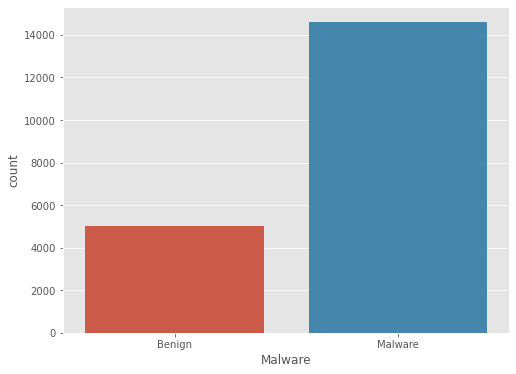

In [82]:
plt.figure(figsize=(8, 6))
ax=sns.countplot(data['Malware'])
ax.set_xticklabels(['Benign', 'Malware'])

### Features visualization

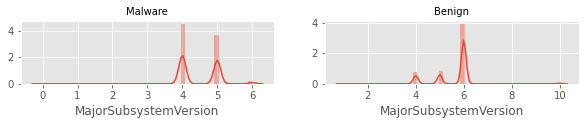

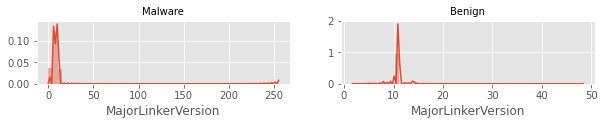

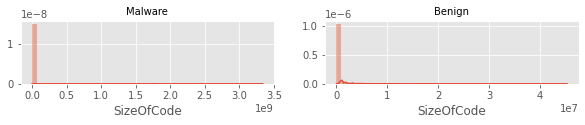

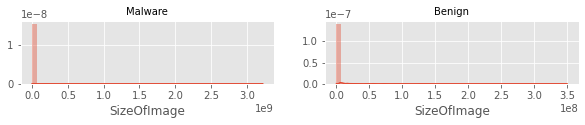

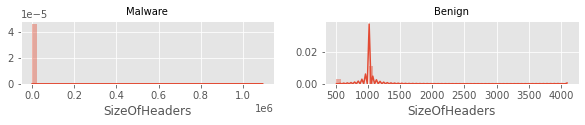

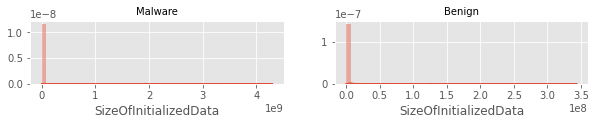

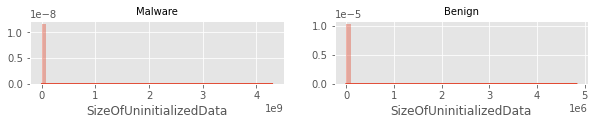

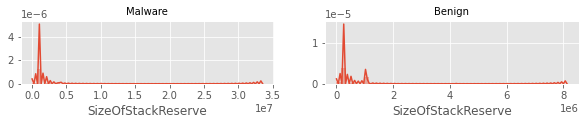

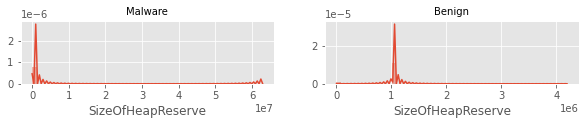

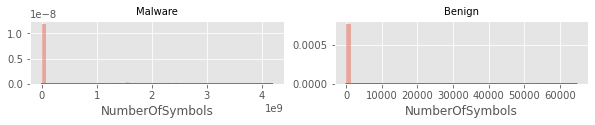

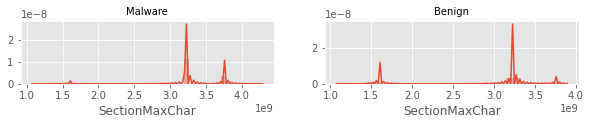

In [83]:
features = ['MajorSubsystemVersion', 'MajorLinkerVersion', 'SizeOfCode', 'SizeOfImage', 'SizeOfHeaders', 'SizeOfInitializedData', 
           'SizeOfUninitializedData', 'SizeOfStackReserve', 'SizeOfHeapReserve', 
            'NumberOfSymbols', 'SectionMaxChar']
i=1

for feature in features:
    plt.figure(figsize=(10, 15))
    ax1 = plt.subplot(len(features), 2, i)
    sns.distplot(data[data['Malware']==1][feature], ax=ax1, kde_kws={'bw': 0.1})
    ax1.set_title(f'Malware', fontsize=10)
    ax2 = plt.subplot(len(features), 2, i+1)
    sns.distplot(data[data['Malware']==0][feature], ax=ax2, kde_kws={'bw': 0.1})
    ax2.set_title(f'Benign', fontsize=10)
    i= i+2
    

### Splitting the data

In [84]:
X_train, X_test, y_train, y_test = train_test_split(used_data, data['Malware'], test_size=0.2, random_state=0)

In [85]:
print(f'Number of used features is {X_train.shape[1]}')

Number of used features is 75


In [86]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC

from sklearn.metrics import confusion_matrix  
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import classification_report

In [87]:

print('--------Applying GaussianNB Classifier ----------')
gnb = GaussianNB()
gnb_fit = gnb.fit(X_train, y_train)  
gnb_prediction = gnb.predict(X_test) 


print('--------Applying KNeighborsClassifier Classifier ----------')
KNN_model = KNeighborsClassifier(n_neighbors=5)
KNN_model.fit(X_train, y_train)
KNN_prediction = KNN_model.predict(X_test)

print('--------Applying RandomForestClassifier Classifier ----------')
RF = RandomForestClassifier(max_depth=10, random_state=100)  
RF.fit(X_train, y_train)
RF_prediction = RF.predict(X_test)

print('--------Applying Support vector machine Classifier ----------')
SVM = LinearSVC(loss='hinge', dual=True)
SVM.fit(X_train,y_train)
SVM_prediction = SVM.predict(X_test)

--------Applying GaussianNB Classifier ----------
--------Applying KNeighborsClassifier Classifier ----------
--------Applying RandomForestClassifier Classifier ----------
--------Applying Support vector machine Classifier ----------


/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [88]:
print('-------Performance Evaluation----------')
#precision_score, recall_score, f1_score, accuracy_score
results = []
selector = 'LR'
results.append((selector,'','', '',''))
results.append(('Classifier','Accurary','Precision', 'Recall','F1-Score'))
results.append(('KNN ', accuracy_score(y_test, KNN_prediction)*100,
                precision_score(y_test, KNN_prediction)*100,
                recall_score(y_test, KNN_prediction)*100,
                f1_score(y_test, KNN_prediction)*100))
results.append(('RF ', accuracy_score(y_test,  RF_prediction)*100,
                precision_score(y_test,  RF_prediction)*100,
                recall_score(y_test,  RF_prediction)*100,
                f1_score(y_test,  RF_prediction)*100))
results.append(('NB ', accuracy_score(y_test,  gnb_prediction)*100,
                precision_score(y_test,  gnb_prediction)*100,
                recall_score(y_test,  gnb_prediction)*100,
                f1_score(y_test,  gnb_prediction)*100))
results.append(('SVM ', accuracy_score(y_test,  SVM_prediction)*100,
                precision_score(y_test,  SVM_prediction)*100,
                recall_score(y_test,  SVM_prediction)*100,
                f1_score(y_test,  SVM_prediction)*100))


print('type(results): ', type(results))
print('results: ', results)
df_results = pd.DataFrame(results)
print('type(df_results): ', type(df_results))
print('df_results: ', df_results)

-------Performance Evaluation----------
type(results):  <class 'list'>
results:  [('LR', '', '', '', ''), ('Classifier', 'Accurary', 'Precision', 'Recall', 'F1-Score'), ('KNN ', 96.38032118276828, 97.2118327099626, 97.94450154162384, 97.57679180887372), ('RF ', 98.34310476676013, 98.2420554428668, 99.55464200068516, 98.89399353411605), ('NB ', 32.39867448381341, 98.9010989010989, 9.249743062692703, 16.917293233082706), ('SVM ', 74.84068315065001, 74.7438524590164, 99.9657416923604, 85.53422248277883)]
type(df_results):  <class 'pandas.core.frame.DataFrame'>
df_results:              0         1          2        3         4
0          LR                                        
1  Classifier  Accurary  Precision   Recall  F1-Score
2        KNN    96.3803    97.2118  97.9445   97.5768
3         RF    98.3431    98.2421  99.5546    98.894
4         NB    32.3987    98.9011  9.24974   16.9173
5        SVM    74.8407    74.7439  99.9657   85.5342


In [89]:
print('Confusion Matrix gnb_prediction')
print(confusion_matrix(y_test,gnb_prediction))
print('Confusion Matrix KNN_prediction')
print(confusion_matrix(y_test,KNN_prediction))
print('Confusion Matrix RF_prediction')
print(confusion_matrix(y_test,RF_prediction))
print('Confusion Matrix SVM_prediction')
print(confusion_matrix(y_test,SVM_prediction))

Confusion Matrix gnb_prediction
[[1001    3]
 [2649  270]]
Confusion Matrix KNN_prediction
[[ 922   82]
 [  60 2859]]
Confusion Matrix RF_prediction
[[ 952   52]
 [  13 2906]]
Confusion Matrix SVM_prediction
[[  18  986]
 [   1 2918]]


In [90]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

SVM Model Accuracy: 0.748407


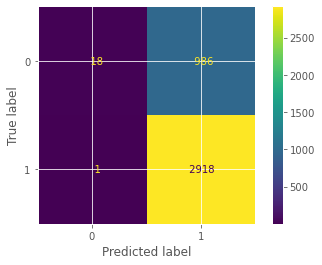

In [91]:
confusionmatrix = plot_confusion_matrix(SVM, X_test, y_test, values_format='5d')
print("SVM Model Accuracy: %f" % SVM.score(X_test, y_test))  
plt.show()

Naive Bayes Model Accuracy: 0.323987


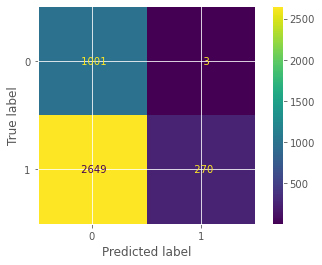

In [92]:
confusionmatrix = plot_confusion_matrix(gnb, X_test, y_test, values_format='5d')
print("Naive Bayes Model Accuracy: %f" % gnb.score(X_test, y_test))  
plt.show()

 Random Forest Model Accuracy: 0.983431


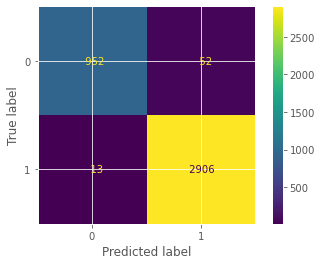

In [93]:
confusionmatrix = plot_confusion_matrix(RF, X_test, y_test, values_format='5d')
print(" Random Forest Model Accuracy: %f" % RF.score(X_test, y_test))  
plt.show()

KKN Model Accuracy: 0.963803


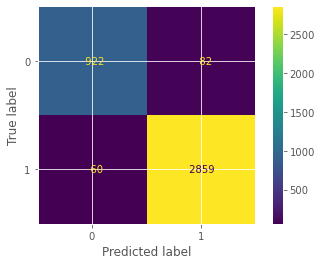

In [94]:
confusionmatrix = plot_confusion_matrix(KNN_model, X_test, y_test, values_format='5d')
print("KKN Model Accuracy: %f" % KNN_model.score(X_test, y_test))  
plt.show()

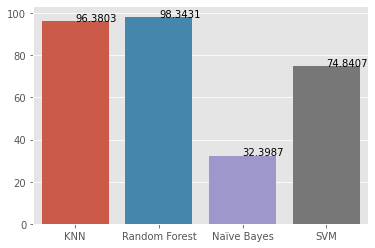

In [99]:
Myscore1 = {'KNN' : 96.3803,'Random Forest': 98.3431, 'Naïve Bayes': 32.3987, 'SVM' : 74.8407}
score1= list(Myscore1.values())
model = list(Myscore1.keys())
sns.barplot(model,score1) 
for index, value in enumerate(score1): 
    plt.text(index,value,str(value)) 
    
plt.show() 

In [96]:
from tabulate import tabulate
Myscore3 = [['KNN', KNN_model.score(X_test, y_test)*100],
            ['Random Forest', RF.score(X_test, y_test)*100], 
            ['Naïve Bayes', gnb.score(X_test, y_test)*100], 
            ['SVM' , SVM.score(X_test, y_test)*100]]

  
#define header names
col_names = ["Model", "Accuracy"]
  
#display table
print(tabulate(Myscore3, headers=col_names))

Model            Accuracy
-------------  ----------
KNN               96.3803
Random Forest     98.3431
Naïve Bayes       32.3987
SVM               74.8407


In [97]:
print('df_results: ', df_results)

df_results:              0         1          2        3         4
0          LR                                        
1  Classifier  Accurary  Precision   Recall  F1-Score
2        KNN    96.3803    97.2118  97.9445   97.5768
3         RF    98.3431    98.2421  99.5546    98.894
4         NB    32.3987    98.9011  9.24974   16.9173
5        SVM    74.8407    74.7439  99.9657   85.5342


#### Saving model

In [100]:
pkl_filename = "rf_model.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(rfc, file)